<a href="https://colab.research.google.com/github/Sanarazaaa/Phylogenetic-Reconstruction-of-North-American-Sea-Ducks-Using-Genomic-Data/blob/main/Phylogenetic_Analysis_of_Sea_Ducks_Using_Biopython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving seaduck_genomic_NAmer_sonsthagen.csv to seaduck_genomic_NAmer_sonsthagen.csv
User uploaded file "seaduck_genomic_NAmer_sonsthagen.csv" with length 36177 bytes


In [3]:
import pandas as pd
from google.colab import files

# Upload the file
uploaded = files.upload()

# Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Load the CSV file with the correct path
# Assuming it's in the current directory after upload
file_path = file_name  # Use the uploaded file name directly
seaduck_data = pd.read_csv(file_path)

# Display basic information and the first few rows
seaduck_data.info(), seaduck_data.head()

Saving seaduck_genomic_NAmer_sonsthagen.csv to seaduck_genomic_NAmer_sonsthagen (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sample_ID          375 non-null    object
 1   Scientific_Name    375 non-null    object
 2   Sample_Location    375 non-null    object
 3   SRA Project        364 non-null    object
 4   BioSample          364 non-null    object
 5   GenBank_Accession  15 non-null     object
dtypes: object(6)
memory usage: 17.8+ KB


(None,
    Sample_ID      Scientific_Name                    Sample_Location  \
 0  BAGO15111  Bucephala islandica  Canada: Kitimat, British Columbia   
 1  BAGO15112  Bucephala islandica  Canada: Kitimat, British Columbia   
 2  BAGO15126  Bucephala islandica  Canada: Kitimat, British Columbia   
 3  BAGO15132  Bucephala islandica  Canada: Kitimat, British Columbia   
 4  BAGO15133  Bucephala islandica  Canada: Kitimat, British Columbia   
 
    SRA Project     BioSample GenBank_Accession  
 0  PRJNA649808  SAMN15681561               NaN  
 1  PRJNA649808  SAMN15681562               NaN  
 2  PRJNA649808  SAMN15681563               NaN  
 3  PRJNA649808  SAMN15681564               NaN  
 4  PRJNA649808  SAMN15681565               NaN  )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sample_ID          375 non-null    object
 1   Scientific_Name    375 non-null    object
 2   Sample_Location    375 non-null    object
 3   SRA Project        364 non-null    object
 4   BioSample          364 non-null    object
 5   GenBank_Accession  15 non-null     object
dtypes: object(6)
memory usage: 17.8+ KB
None
   Sample_ID      Scientific_Name                    Sample_Location  \
0  BAGO15111  Bucephala islandica  Canada: Kitimat, British Columbia   
1  BAGO15112  Bucephala islandica  Canada: Kitimat, British Columbia   
2  BAGO15126  Bucephala islandica  Canada: Kitimat, British Columbia   
3  BAGO15132  Bucephala islandica  Canada: Kitimat, British Columbia   
4  BAGO15133  Bucephala islandica  Canada: Kitimat, British Columbia   

   SRA Project     BioSample GenBank_Acce

<ipython-input-8-a2c6ade6dff2>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Scientific_Name', data=seaduck_data, order=seaduck_data['Scientific_Name'].value_counts().index, palette='viridis')


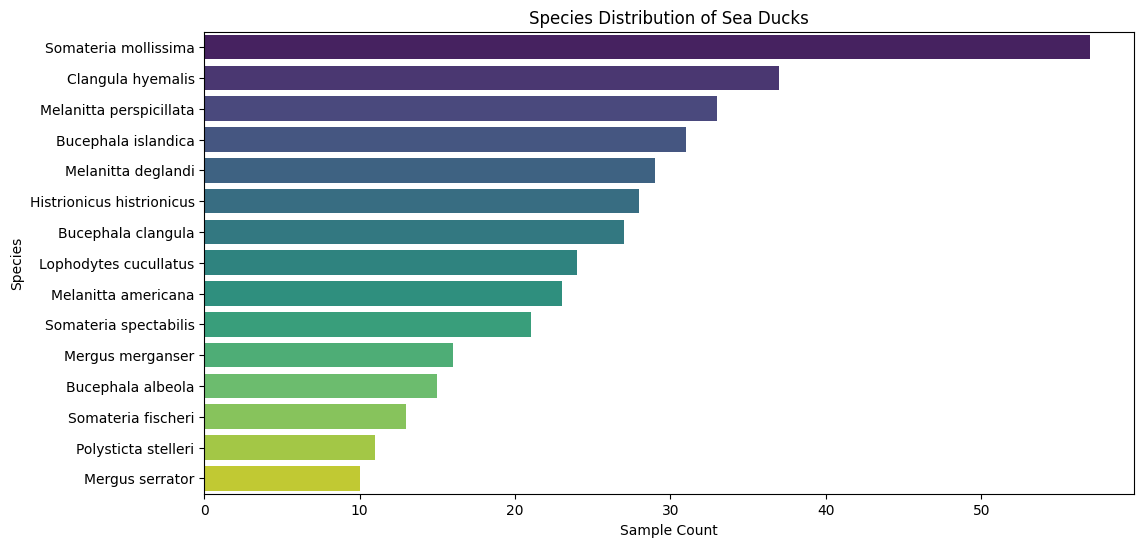

<ipython-input-8-a2c6ade6dff2>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Sample_Location', data=seaduck_data, order=seaduck_data['Sample_Location'].value_counts().index, palette='mako')


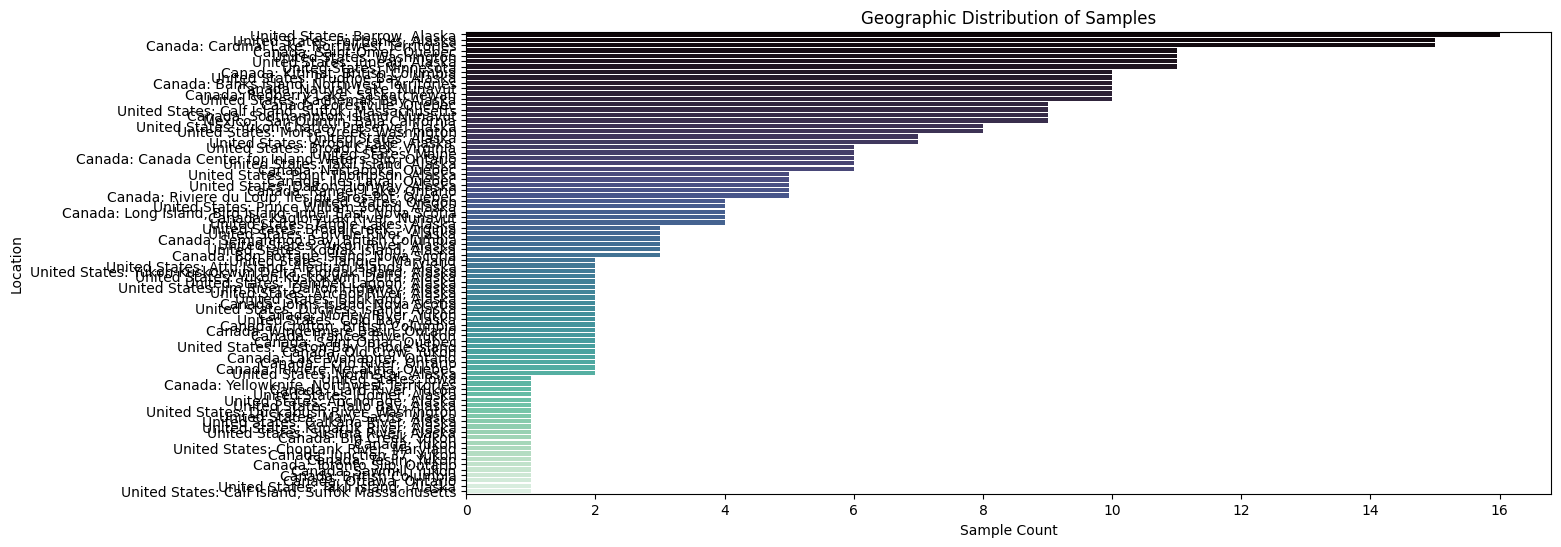

Missing Values:
 Sample_ID              1
Scientific_Name        1
Sample_Location        1
SRA Project           12
BioSample             12
GenBank_Accession    361
dtype: int64

Duplicate Samples:
 0
GenBank Accessions Available: 15


In [8]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset
file_path = 'seaduck_genomic_NAmer_sonsthagen.csv'
seaduck_data = pd.read_csv(file_path)
# Step 3: Data Overview
print(seaduck_data.info())
print(seaduck_data.head())

# Step 4: Species Distribution Analysis
plt.figure(figsize=(12, 6))
sns.countplot(y='Scientific_Name', data=seaduck_data, order=seaduck_data['Scientific_Name'].value_counts().index, palette='viridis')
plt.title('Species Distribution of Sea Ducks')
plt.xlabel('Sample Count')
plt.ylabel('Species')
plt.show()

# Step 5: Geographic Distribution Analysis
plt.figure(figsize=(14, 6))
sns.countplot(y='Sample_Location', data=seaduck_data, order=seaduck_data['Sample_Location'].value_counts().index, palette='mako')
plt.title('Geographic Distribution of Samples')
plt.xlabel('Sample Count')
plt.ylabel('Location')
plt.show()

# Step 6: Check for Missing Values and Duplicates
print("Missing Values:\n", seaduck_data.isnull().sum())
print("\nDuplicate Samples:\n", seaduck_data.duplicated().sum())

# Step 7: Analyze GenBank Records
print("GenBank Accessions Available:", seaduck_data['GenBank_Accession'].notnull().sum())


In [5]:
# Install necessary libraries
!pip install biopython plotly

# Import required libraries
import pandas as pd
from Bio import Entrez, SeqIO, Phylo
import matplotlib.pyplot as plt
from io import StringIO
import plotly.graph_objects as go

# Load the dataset
file_path = '/content/seaduck_genomic_NAmer_sonsthagen.csv'
seaduck_data = pd.read_csv(file_path)

# Display dataset info
print(seaduck_data.info())
print(seaduck_data.head())

# Filter rows with valid GenBank Accession numbers
genbank_data = seaduck_data.dropna(subset=['GenBank_Accession'])
print("Filtered GenBank records:\n", genbank_data[['Scientific_Name', 'GenBank_Accession']])


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 41.4 MB/s eta 0:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sample_ID          375 non-null    object
 1   Scientific_Name    375 non-null    object
 2   Sample_Location    375 non-null    object
 3   SRA Project        364 non-null    object
 4   BioSample          364 non-null    object
 5   GenBank_Accession  15 non-null     object
dtypes: object(6)
memory usage: 17.8+ KB
None
   Sample_ID      Scientific_Name                    Sample_Location  \
0  BAGO15111  Bucephala islandica  Canada: Kitimat, British Columbia   
1  BAGO15112  Bucephala islandica  Canada: Kitimat, British Columbia   
2  BAGO15126  Bucephala islandica  Canada: Kitimat, British Columbia   
3  BAGO15132  Bucephala islandica  Canada: Kitimat, British Columbia   
4  BAGO15133  Bucephala islandica  Ca

In [6]:
# Configure Entrez (use a valid email)
Entrez.email = "sana.raza.eng@gmail.com"

# Function to fetch sequences from GenBank
def fetch_sequence(accession):
    try:
        handle = Entrez.efetch(db="nucleotide", id=accession, rettype="fasta", retmode="text")
        record = handle.read()
        handle.close()
        return record
    except Exception as e:
        print(f"Error fetching {accession}: {e}")
        return None

# Fetch sequences for each valid GenBank accession
sequences = {}
for _, row in genbank_data.iterrows():
    acc = row['GenBank_Accession']
    seq = fetch_sequence(acc)
    if seq:
        sequences[acc] = seq
        print(f"Fetched: {acc}")

# Save sequences to a FASTA file
with open("seaduck_sequences.fasta", "w") as fasta_file:
    for acc, seq in sequences.items():
        fasta_file.write(seq)

print("FASTA file created: seaduck_sequences.fasta")


Fetched:  MW849286
Fetched: MW849283
Fetched: MW849290
Fetched:  MW849281
Fetched:  MW849292
Fetched:  MW849284
Fetched:  MW849288
Fetched: MW849287
Fetched: MW849291
Fetched: MW849278
Fetched: MW849285
Fetched: MW849289
Fetched: MW849280
Fetched: MW849279
Fetched: MW849282
FASTA file created: seaduck_sequences.fasta


In [7]:
# Install Clustal Omega for sequence alignment
!apt-get install -y clustalo

# Align sequences using Clustal Omega
!clustalo -i seaduck_sequences.fasta -o seaduck_aligned.fasta --force --outfmt=fasta

print("Alignment complete!")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libargtable2-0
The following NEW packages will be installed:
  clustalo libargtable2-0
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 273 kB of archives.
After this operation, 694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libargtable2-0 amd64 13-1.1 [14.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 clustalo amd64 1.2.4-7 [259 kB]
Fetched 273 kB in 1s (281 kB/s)
Selecting previously unselected package libargtable2-0.
(Reading database ... 124926 files and directories currently installed.)
Preparing to unpack .../libargtable2-0_13-1.1_amd64.deb ...
Unpacking libargtable2-0 (13-1.1) ...
Selecting previously unselected package clustalo.
Preparing to unpack .../clustalo_1.2.4-7_amd64.deb ...
Unpacking clustalo (1.2.4-7) ...
Setting up

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
clustalo is already the newest version (1.2.4-7).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
^C
Alignment and guide tree generation complete!
Phylogenetic tree file created successfully.


<Figure size 1200x800 with 0 Axes>

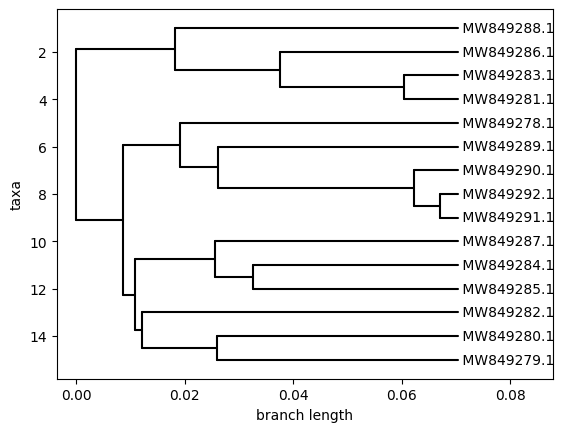

In [11]:
# Install Clustal Omega for sequence alignment
!apt-get install -y clustalo

# Align sequences using Clustal Omega and generate guide tree
!clustalo -i seaduck_sequences.fasta -o seaduck_aligned.fasta --force --outfmt=fasta --guidetree-out=seaduck_tree.dnd

print("Alignment and guide tree generation complete!")

# Check if the file was created
import os
if os.path.exists("seaduck_tree.dnd"):
    print("Phylogenetic tree file created successfully.")
else:
    print("Error: Phylogenetic tree file not found. Check Clustal Omega output.")
    # Handle the error, e.g., exit or skip the tree visualization

# Load the tree and visualize it (only if the file exists)
if os.path.exists("seaduck_tree.dnd"):
    tree = Phylo.read("seaduck_tree.dnd", "newick")

    # Visualize the tree using Matplotlib
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree)
    plt.show()

Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.0181693)
            Clade(branch_length=0.0521184, name='MW849288.1')
            Clade(branch_length=0.0194136)
                Clade(branch_length=0.0327048, name='MW849286.1')
                Clade(branch_length=0.02278)
                    Clade(branch_length=0.00992481, name='MW849283.1')
                    Clade(branch_length=0.00992481, name='MW849281.1')
        Clade(branch_length=0.00863062)
            Clade(branch_length=0.0104876)
                Clade(branch_length=0.0511695, name='MW849278.1')
                Clade(branch_length=0.00705981)
                    Clade(branch_length=0.0441097, name='MW849289.1')
                    Clade(branch_length=0.0360195)
                        Clade(branch_length=0.00809023, name='MW849290.1')
                        Clade(branch_length=0.00490245)
                            Clade(branch_length=0.00318778, name='MW849292.1')
                            Clad

<Figure size 1000x800 with 0 Axes>

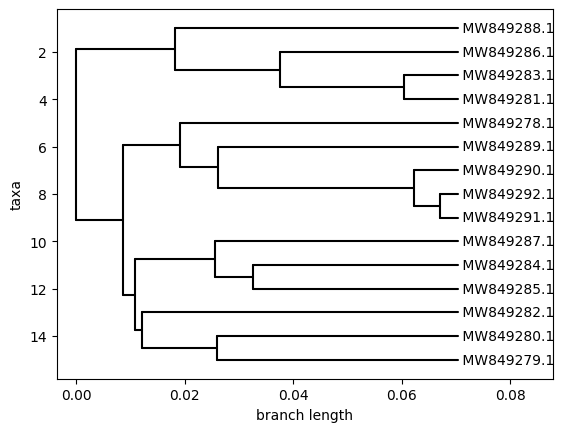

In [19]:
from Bio import Phylo
import matplotlib.pyplot as plt

# Read the tree
tree = Phylo.read("seaduck_tree.dnd", "newick")

# Verify the tree structure
print(tree)

# Visualize the tree
plt.figure(figsize=(10, 8))
Phylo.draw(tree)
plt.show()


In [20]:
import matplotlib
matplotlib.use('Agg')  # Use 'Agg' for static images

plt.figure(figsize=(10, 8))
Phylo.draw(tree)
plt.savefig('phylogenetic_tree.png')
print("Tree saved to phylogenetic_tree.png")


Tree saved to phylogenetic_tree.png


In [22]:
import plotly.graph_objects as go

# Extract nodes from the tree
def extract_nodes(clade, parent_name=None):
    nodes = []
    if clade.name:
        nodes.append((clade.name, parent_name))
    for subclade in clade.clades:
        nodes.extend(extract_nodes(subclade, clade.name if clade.name else parent_name))
    return nodes

nodes = extract_nodes(tree.root)

# Create Sankey diagram for the tree
fig = go.Figure(go.Sankey(
    node=dict(
        label=[n[0] for n in nodes],
        color="lightblue"
    ),
    link=dict(
        source=[nodes.index((n[1], p)) for n, p in nodes if p],
        target=[nodes.index((n, p)) for n, p in nodes if p]
    )
))

fig.update_layout(title="Sea Duck Phylogenetic Tree", font=dict(size=12))
fig.show()


In [26]:
Phylo.draw_ascii(tree)


                  _______________________________________________ MW849288.1
  _______________|
 |               |                  _____________________________ MW849286.1
 |               |_________________|
 |                                 |                     ________ MW849283.1
 |                                 |____________________|
 |                                                      |________ MW849281.1
 |
_|                 ______________________________________________ MW849278.1
 |       _________|
 |      |         |       _______________________________________ MW849289.1
 |      |         |______|
 |      |                |                                 ______ MW849290.1
 |      |                |________________________________|
 |      |                                                 |     _ MW849292.1
 |______|                                                 |____|
        |                                                      |_ MW849291.1
        |
        

In [28]:
import matplotlib.pyplot as plt
from Bio import Phylo
import plotly.graph_objects as go
import networkx as nx

# Load the tree
tree_path = "seaduck_tree.dnd"
tree = Phylo.read(tree_path, "newick")

# Convert the tree to a NetworkX graph
graph = Phylo.to_networkx(tree)

# Calculate node positions using a layout algorithm (e.g., 'spring_layout')
pos = nx.spring_layout(graph)  # You can experiment with other layout algorithms

# Extract edge and node information
edges = list(graph.edges())
nodes = list(graph.nodes())

# Extract coordinates for Plotly using the calculated positions
x_edges = []
y_edges = []
for edge in edges:
    x0, y0 = pos[edge[0]]  # Get coordinates from 'pos' dictionary
    x1, y1 = pos[edge[1]]
    x_edges.extend([x0, x1, None])
    y_edges.extend([y0, y1, None])

# Create node labels (taxa names)
node_labels = [str(node) for node in nodes]

# Create Plotly figure
fig = go.Figure()

# Add tree edges
fig.add_trace(go.Scatter(x=x_edges, y=y_edges, mode='lines', line=dict(color='black'), name='Branches'))

# Add node labels
for node in nodes:
    x, y = pos[node]  # Get coordinates from 'pos' dictionary
    fig.add_trace(go.Scatter(x=[x], y=[y], mode='text', text=str(node), name='Taxa'))

# Customize layout
fig.update_layout(title='Sea Duck Phylogenetic Tree (Plotly)',
                  showlegend=False,
                  xaxis=dict(title='Branch Length'),
                  yaxis=dict(title='Taxa'))

# Display the tree
fig.show()

In [25]:
import matplotlib.pyplot as plt
from Bio import Phylo

# Load and display the tree
tree = Phylo.read(tree_path, "newick")

# Adjust figure size and save the tree as an image
plt.figure(figsize=(12, 8))
Phylo.draw(tree)
plt.savefig("seaduck_phylogenetic_tree.png")
plt.show()

print("Tree saved to 'seaduck_phylogenetic_tree.png'")


Tree saved to 'seaduck_phylogenetic_tree.png'


In [24]:
from Bio import Phylo

# Check if the tree file exists and print its structure
tree_path = "seaduck_tree.dnd"

try:
    tree = Phylo.read(tree_path, "newick")
    print(tree)  # Output the tree structure to verify
except Exception as e:
    print(f"Error reading tree: {e}")


Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.0181693)
            Clade(branch_length=0.0521184, name='MW849288.1')
            Clade(branch_length=0.0194136)
                Clade(branch_length=0.0327048, name='MW849286.1')
                Clade(branch_length=0.02278)
                    Clade(branch_length=0.00992481, name='MW849283.1')
                    Clade(branch_length=0.00992481, name='MW849281.1')
        Clade(branch_length=0.00863062)
            Clade(branch_length=0.0104876)
                Clade(branch_length=0.0511695, name='MW849278.1')
                Clade(branch_length=0.00705981)
                    Clade(branch_length=0.0441097, name='MW849289.1')
                    Clade(branch_length=0.0360195)
                        Clade(branch_length=0.00809023, name='MW849290.1')
                        Clade(branch_length=0.00490245)
                            Clade(branch_length=0.00318778, name='MW849292.1')
                            Clad